In [384]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [385]:
# Initial conditions
mBR = 1
mBA = 1
mCLN = 0
Cln = 0
BR = 25
BAm = 8.5
BAd = 0
A0 = 25**(2/3)

y0 = [mCLN, Cln, BR, BAm, BAd]

# Parameters
kd1_G = 0.1
kd2_G = 0.1
kp_G = 0.35
kR_G = 4.75
kAd_G = 0
kAm_G = 1
kgrowth_G = 0.02 
kR_M = 2
kAd_M =  1
kAm_M =  0
kx = 1
kd2_M = 10

# Simulation time
t0 = 0
t_end = 100

In [386]:
# Model
def A(BAm, BAd):
    # f = A0 + kx*(BAm + BAd)
    f = A0
    return f

def f(mCLN, t):
    f = mCLN + np.random.randint(0,2)
    return f

def model_G(t, y):
    mCLNi, Clni, BRi, BAmi, BAdi = y
    if Clni < 150:
        dmCLN = -kd1_G*f(mCLNi, t)
        dCln = kp_G*mCLNi*BRi*A(BAmi, BAdi)-kd2_G*Clni
        dBR = kgrowth_G*(kR_G/(kR_G+kAm_G+kAd_G))*mBR*BRi*A(BAmi, BAdi)
        dBAm = kgrowth_G*(kAm_G/(kR_G+kAm_G+kAd_G))*mBA*BRi*A(BAmi, BAdi)
        dBAd = kgrowth_G*(kAd_G/(kR_G+kAm_G+kAd_G))*mBR*BRi*A(BAmi, BAdi)
    else:
        dmCLN = -kd1_G*f(mCLNi, t)
        dCln = kp_G*mCLNi*BRi*A(BAmi, BAdi)-kd2_M*Clni
        dBR = kgrowth_G*(kR_M/(kR_M+kAm_M+kAd_M))*mBR*BRi*A(BAmi, BAdi)
        dBAm = kgrowth_G*(kAm_M/(kR_M+kAm_M+kAd_M))*mBA*BRi*A(BAmi, BAdi)
        dBAd = kgrowth_G*(kAd_M/(kR_M+kAm_M+kAd_M))*mBR*BRi*A(BAmi, BAdi)
    return [dmCLN, dCln, dBR, dBAm, dBAd]

In [387]:
# Solving ODE
sol = solve_ivp(model_G,  [t0, t_end], y0)
mCLN, Cln, BR, BAm, BAd = sol.y

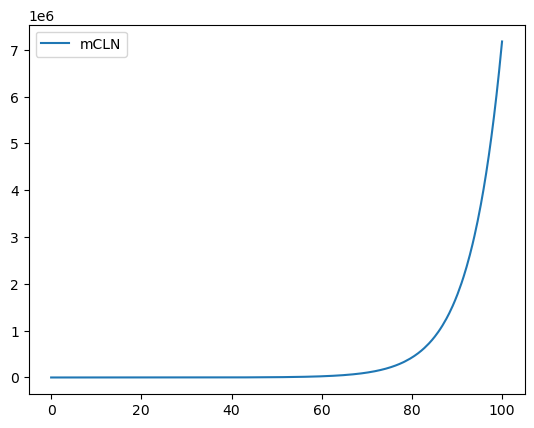

In [388]:
# Plotting
plt.plot(sol.t, BAm, label = 'mCLN')
#plt.plot(t, BR, label = 'BAm')
plt.legend()
plt.show()